<a href="https://colab.research.google.com/github/kartikpanchal-opencv/Mushroom-clustering/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [19]:
df = pd.read_csv("/content/Mushroom-dataset/agaricus-lepiota.data")
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [21]:
df.isnull().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [22]:
df['p'].value_counts()

e    4208
p    3915
Name: p, dtype: int64

In [23]:
df = df[df['e.1'] != '?'] #removing rows with value  '?'

In [24]:
df.shape

(5643, 23)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
df.columns
for col in df.columns:
  df[col] = le.fit_transform(df[col])
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
1,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
2,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
3,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1
4,0,5,3,7,1,0,1,0,0,3,...,2,5,5,0,0,1,3,1,2,1


In [27]:
x = df.drop(columns='p')
y = df['p']

y.head()

0    0
1    0
2    1
3    0
4    0
Name: p, dtype: int64

In [28]:
x.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,7,1,0,1,0,0,2,0,...,2,5,5,0,0,1,3,2,2,1
1,0,2,6,1,3,1,0,0,3,0,...,2,5,5,0,0,1,3,2,2,3
2,5,3,6,1,6,1,0,1,3,0,...,2,5,5,0,0,1,3,1,3,5
3,5,2,3,0,5,1,1,0,2,1,...,2,5,5,0,0,1,0,2,0,1
4,5,3,7,1,0,1,0,0,3,0,...,2,5,5,0,0,1,3,1,2,1


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, shuffle=True, random_state=69)

In [31]:
x_test.shape

(1411, 22)

In [32]:
y_train.shape

(4232,)

In [33]:
y_test.shape

(1411,)

 #ONE HOT CODING

In [34]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=2)

print(y_train[:5])

1741    0
4117    1
2659    0
2025    0
469     0
Name: p, dtype: int64
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [35]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [36]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                736       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,914
Trainable params: 2,914
Non-trainabl

In [38]:
model.fit(x_train, y_train, batch_size=500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
7/7 - 2s - loss: 1.1859 - accuracy: 0.5143 - val_loss: 0.6875 - val_accuracy: 0.6057 - 2s/epoch - 341ms/step
Epoch 2/100
7/7 - 0s - loss: 0.9751 - accuracy: 0.5409 - val_loss: 0.6658 - val_accuracy: 0.6068 - 74ms/epoch - 11ms/step
Epoch 3/100
7/7 - 0s - loss: 0.8189 - accuracy: 0.5719 - val_loss: 0.6270 - val_accuracy: 0.6116 - 73ms/epoch - 10ms/step
Epoch 4/100
7/7 - 0s - loss: 0.7234 - accuracy: 0.5929 - val_loss: 0.6009 - val_accuracy: 0.6316 - 89ms/epoch - 13ms/step
Epoch 5/100
7/7 - 0s - loss: 0.6641 - accuracy: 0.6204 - val_loss: 0.5739 - val_accuracy: 0.6753 - 93ms/epoch - 13ms/step
Epoch 6/100
7/7 - 0s - loss: 0.6075 - accuracy: 0.6768 - val_loss: 0.5445 - val_accuracy: 0.7285 - 78ms/epoch - 11ms/step
Epoch 7/100
7/7 - 0s - loss: 0.5697 - accuracy: 0.6984 - val_loss: 0.5090 - val_accuracy: 0.7662 - 75ms/epoch - 11ms/step
Epoch 8/100
7/7 - 0s - loss: 0.5391 - accuracy: 0.7244 - val_loss: 0.4707 - val_accuracy: 0.8005 - 78ms/epoch - 11ms/step
Epoch 9/100
7/7 - 0s - lo

In [39]:
prediction = model.predict(x_test)
print(prediction[:5])

45/45 [==============================] - 0s 1ms/step
[[9.9999994e-01 9.0696582e-12]
 [9.9999994e-01 7.8403416e-11]
 [4.0905223e-14 9.9999994e-01]
 [1.2919171e-13 9.9999994e-01]
 [9.9999994e-01 5.2833340e-13]]


In [40]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 0 1 1 0]


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

1.0


In [43]:
con_matrix = confusion_matrix(y_test, prediction)
print(con_matrix)

[[901   0]
 [  0 510]]


Text(50.722222222222214, 0.5, 'actual')

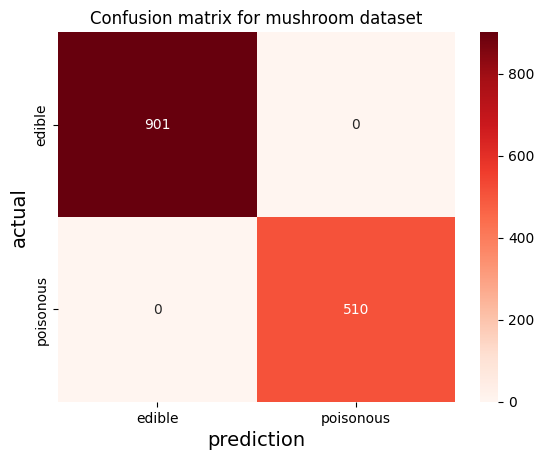

In [44]:
label = ['edible','poisonous']
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)